In [1]:
library(tidyverse)
library(httr2) # for making api requests
library(uuid)  # For generating a UUID
library(jsonlite) # for working with JSONs
library(ggExtra)


── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'jsonlite'


The following object is masked from 'package:purrr':

    flatten


Warning message:
"package 'ggExtra' was built under R version 4.4.3"


In [4]:
matches <- read_csv("sample_data/matches.csv")

Rows: 230507 Columns: 19
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (17): column_label, lifetime_1, lifetime_0, stats.apm_1, stats.apm_0, st...
lgl  (2): alive_1, alive_0

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
head(matches)

column_label,alive_1,alive_0,lifetime_1,lifetime_0,stats.apm_1,stats.apm_0,stats.pps_1,stats.pps_0,stats.vsscore_1,stats.vsscore_0,stats.garbagesent_1,stats.garbagesent_0,stats.garbagereceived_1,stats.garbagereceived_0,stats.kills_1,stats.kills_0,stats.btb_1,stats.btb_0
<dbl>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TRUE,FALSE,67224,67213,234.6852,211.1332,3.612839,3.891650,474.7450,444.3340,192,173,118,138,1,0,2,0
2,TRUE,FALSE,11779,11776,198.5486,123.9598,3.047896,3.443329,400.5806,223.8164,35,14,14,35,1,0,7,0
3,FALSE,TRUE,47962,47967,165.8060,178.4916,2.721563,3.833799,345.4292,379.1899,98,98,85,83,0,1,0,6
4,FALSE,TRUE,38200,38210,175.2632,219.5700,3.236842,3.685827,373.6842,405.4410,61,105,99,46,0,1,0,1
5,TRUE,FALSE,24110,24106,166.8539,140.2923,3.370787,3.590814,303.3708,242.1712,55,40,17,32,1,0,0,5
6,TRUE,FALSE,29947,29940,238.1166,161.3445,3.363229,3.731092,474.2152,356.3025,96,53,41,84,1,0,0,0


Warning message:
"Removed 168 rows containing missing values or values outside the scale range (`geom_point()`)."


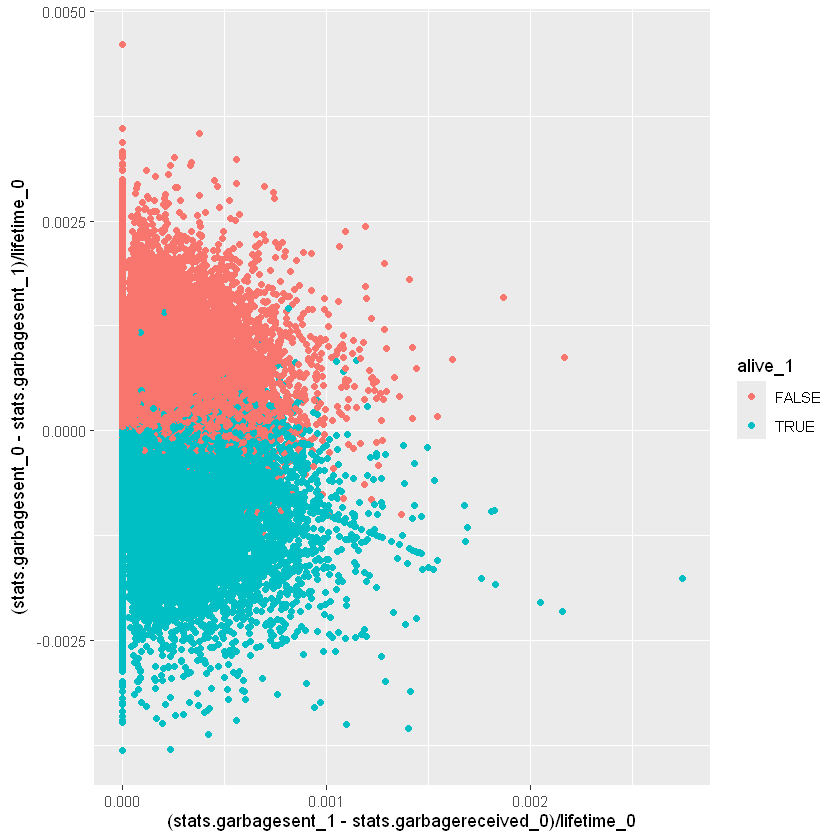

In [18]:
b2b_compare <- matches %>%
    ggplot(aes(x = (stats.garbagesent_1 - stats.garbagereceived_0)/	lifetime_0 , y = (stats.garbagesent_0 - stats.garbagesent_1)/lifetime_0 , color = alive_1)) +
    geom_point()
b2b_compare